# Problem Statement
- Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

- Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('train_LP.csv')
test = pd.read_csv('test_LP.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train.shape

(614, 13)

In [7]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mean())

In [9]:
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

In [10]:
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N


## Exploratory Data Analysis

In [11]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
target = ['Loan_Status']

### Univariate Analysis

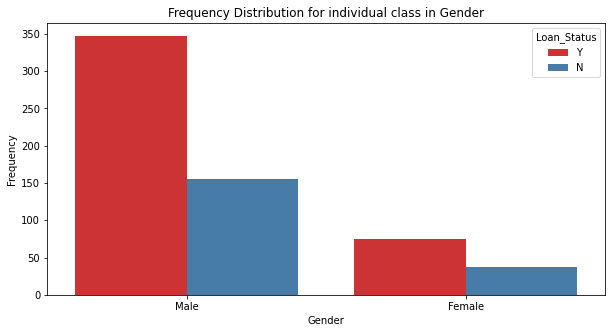

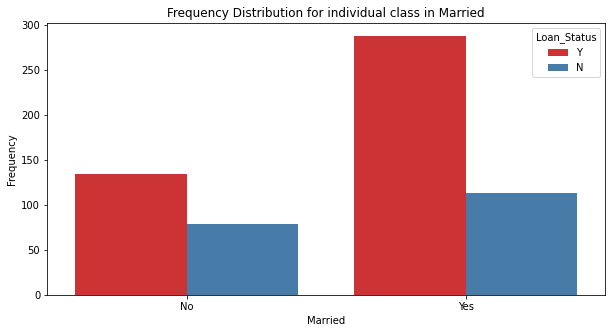

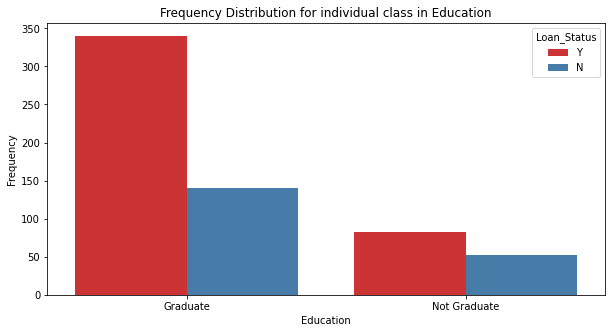

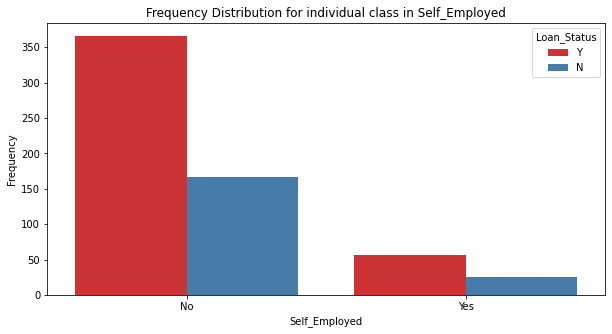

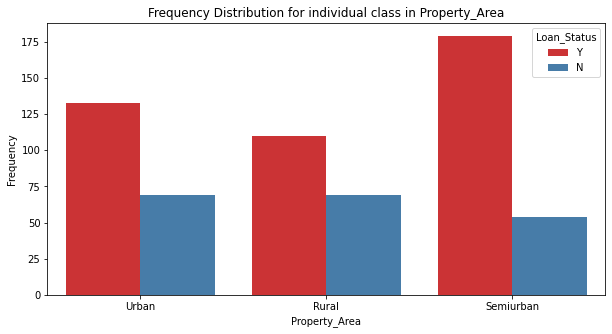

In [13]:
for col in cat_cols:
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111)
    sns.countplot(x = col, data = train, hue=train['Loan_Status'], ax = ax, palette='Set1')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency Distribution for individual class in {col}')

C:\Users\rahul13\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

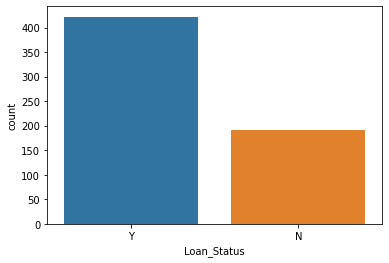

In [14]:
sns.countplot(train['Loan_Status'])

C:\Users\rahul13\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rahul13\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rahul13\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

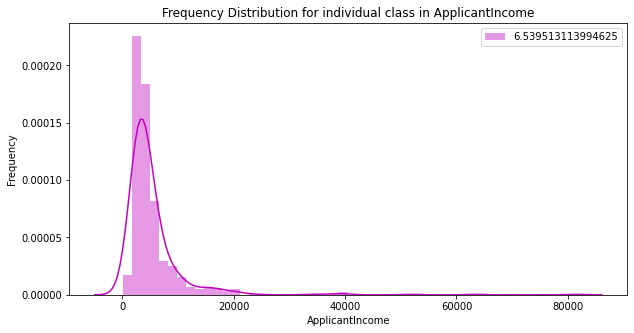

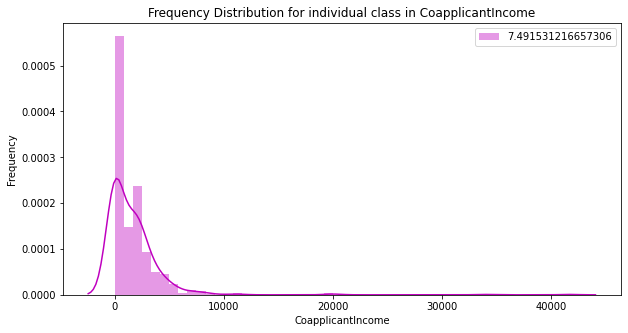

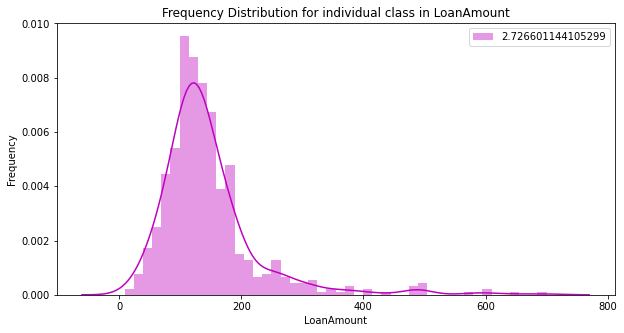

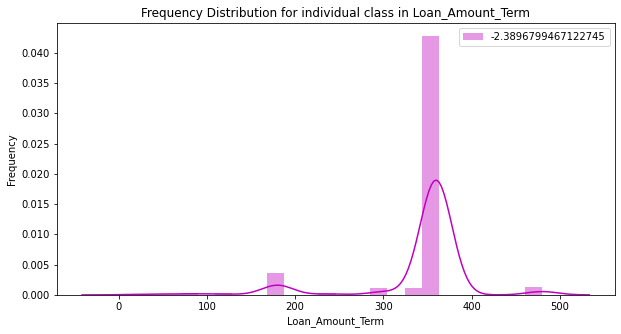

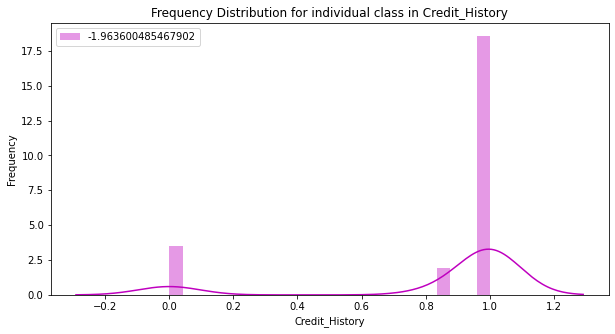

In [15]:
for col in num_cols:
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    ax = sns.distplot(train[col], color='m', label=train[col].skew())
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency Distribution for individual class in {col}')
    ax.legend()

### Bivariate Analysis

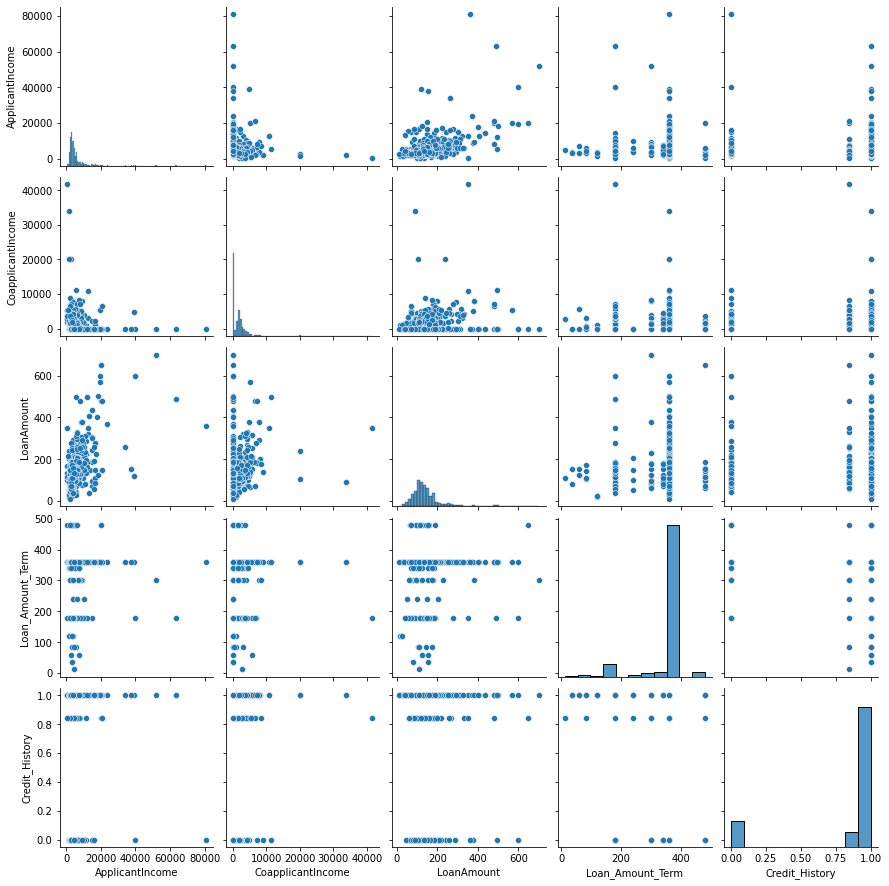

In [16]:
sns.pairplot(train[num_cols])

<AxesSubplot:>

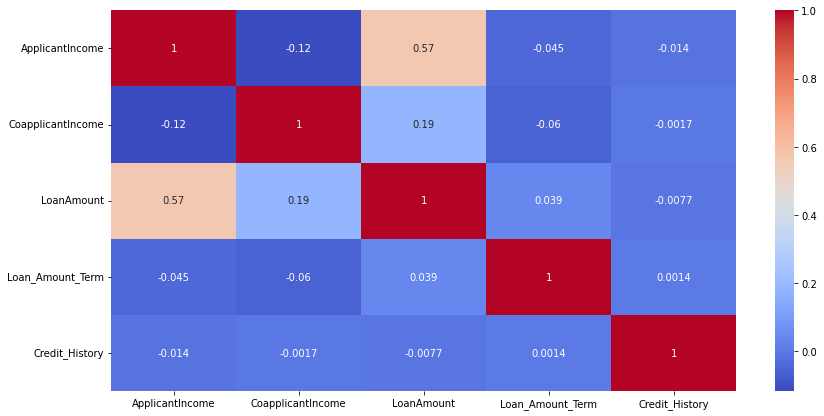

In [17]:
corr = train.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Catorigal Encoding

In [18]:
train[cat_cols + num_cols].head()

,Gender,Married,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,Male,No,Graduate,No,Urban,5849,0.0,146.412162,360.0,1.0
1,Male,Yes,Graduate,No,Rural,4583,1508.0,128.000000,360.0,1.0
2,Male,Yes,Graduate,Yes,Urban,3000,0.0,66.000000,360.0,1.0
3,Male,Yes,Not Graduate,No,Urban,2583,2358.0,120.000000,360.0,1.0
4,Male,No,Graduate,No,Urban,6000,0.0,141.000000,360.0,1.0


In [19]:
pd.get_dummies(train[cat_cols + num_cols], columns= cat_cols, drop_first= True)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,0,0
611,8072,240.0,253.000000,360.0,1.0,1,1,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,1,1,0,0,0,1


In [20]:
train_dm = pd.get_dummies(train[cat_cols + num_cols + target], columns= cat_cols, drop_first =True)

In [21]:
train_dm.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,Y,1,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,N,1,1,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,Y,1,1,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,Y,1,1,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,Y,1,0,0,0,0,1


### Data Split

In [22]:
from sklearn.model_selection import train_test_split
train_data_train, test_data_test = train_test_split(train_dm, test_size=0.2, random_state=102)

In [23]:
train_data_train.shape

(491, 12)

In [24]:
test_data_test.shape

(123, 12)

In [25]:
train_dm.shape

(614, 12)

In [26]:
491+123

614

In [27]:
x_train = train_data_train.drop(target, axis=1)
y_train = train_data_train[target]

In [28]:
x_test = test_data_test.drop(target, axis=1)
y_test = test_data_test[target]

In [29]:
x_train.shape

(491, 11)

In [30]:
y_train.shape

(491, 1)

In [31]:
x_test.shape

(123, 11)

In [32]:
y_test.shape

(123, 1)

### Categorical encoding - Target (Label) Variable

In [33]:
# Lebel Encoding
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()

In [35]:
le.fit(y_train)

C:\Users\rahul13\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [36]:
le.classes_

array(['N', 'Y'], dtype=object)

In [37]:
y_train = le.transform(y_train)

C:\Users\rahul13\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
y_test = le.transform(y_test)

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

C:\Users\rahul13\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
y_test

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [42]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [43]:
len(y_test)

123

In [44]:
len(y_pred)

123

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [46]:
cm = confusion_matrix(y_test, y_pred)

In [47]:
cm

array([[18, 18],
       [ 0, 87]], dtype=int64)

In [48]:
ac = accuracy_score(y_test, y_pred)
ac

0.8536585365853658

In [49]:
precision = precision_score(y_test, y_pred)
precision

0.8285714285714286

In [50]:
recall = recall_score(y_test, y_pred)
recall

1.0

In [51]:
f1 = f1_score(y_test,y_pred)
f1

0.90625

#### Assess a model's performance:
1. Accuracy
2. f1
3. Precision/Recall

# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [53]:
y_test

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [54]:
y_pred_dt

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.59      0.47      0.52        36
           1       0.80      0.86      0.83        87

    accuracy                           0.75       123
   macro avg       0.69      0.67      0.68       123
weighted avg       0.74      0.75      0.74       123



# k-Nearest Neighbour (KNN)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

In [58]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.37      0.19      0.25        36
           1       0.72      0.86      0.79        87

    accuracy                           0.67       123
   macro avg       0.54      0.53      0.52       123
weighted avg       0.62      0.67      0.63       123



<AxesSubplot:>

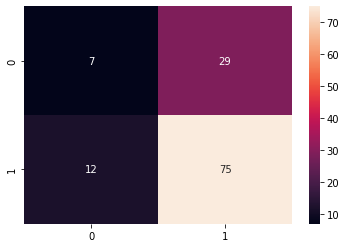

In [59]:
cmknn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cmknn, annot=True)

# Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.53      0.64        36
           1       0.83      0.95      0.89        87

    accuracy                           0.83       123
   macro avg       0.83      0.74      0.77       123
weighted avg       0.83      0.83      0.82       123



# SVM

In [61]:
from sklearn import svm
model_svm = svm.SVC(kernel = 'linear')
model_svm.fit(x_train, y_train)
y_pred_svm = model_svm.predict(x_test)

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.39      0.56        36
           1       0.80      1.00      0.89        87

    accuracy                           0.82       123
   macro avg       0.90      0.69      0.72       123
weighted avg       0.86      0.82      0.79       123



# Model Evaluation

In [62]:
lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
model_rf = RandomForestClassifier()
model_svm = svm.SVC(kernel = 'linear')

models = [lr_model, dt_model, knn_model, model_rf, model_svm]

In [63]:
def evaluate_model(models):
    for model in models:
        print(f"Evaluation for {type(model).__name__} : ")
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        print(f"Confusion Matrix :\n {cm}")
        print(classification_report(y_test, y_pred))
        print("\n"+"*"*30+"\n")

In [64]:
evaluate_model(models)

Evaluation for LogisticRegression : 
Confusion Matrix :
 [[18 18]
 [ 0 87]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        36
           1       0.83      1.00      0.91        87

    accuracy                           0.85       123
   macro avg       0.91      0.75      0.79       123
weighted avg       0.88      0.85      0.84       123


******************************

Evaluation for DecisionTreeClassifier : 
Confusion Matrix :
 [[18 18]
 [13 74]]
              precision    recall  f1-score   support

           0       0.58      0.50      0.54        36
           1       0.80      0.85      0.83        87

    accuracy                           0.75       123
   macro avg       0.69      0.68      0.68       123
weighted avg       0.74      0.75      0.74       123


******************************

Evaluation for KNeighborsClassifier : 
Confusion Matrix :
 [[ 7 29]
 [12 75]]
              precision    recall  f1-score   

C:\Users\rahul13\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix :
 [[19 17]
 [ 3 84]]
              precision    recall  f1-score   support

           0       0.86      0.53      0.66        36
           1       0.83      0.97      0.89        87

    accuracy                           0.84       123
   macro avg       0.85      0.75      0.77       123
weighted avg       0.84      0.84      0.82       123


******************************

Evaluation for SVC : 
Confusion Matrix :
 [[14 22]
 [ 0 87]]
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        36
           1       0.80      1.00      0.89        87

    accuracy                           0.82       123
   macro avg       0.90      0.69      0.72       123
weighted avg       0.86      0.82      0.79       123


******************************



# Submission

In [65]:
Loan_Status = lr_model.predict(x_test)
sub = pd.DataFrame(Loan_Status, columns = ['Loan_Status'])
sub=sub.reset_index()
sub.to_csv('Loan_Status_submission_lr.csv',index=False)

# Conclusion:
- In this project, we tried to build a model using ML algorithms,and the Logistic Regression is the the best possible prediction to get the Loan status.
- The Logistic Regression algorithm gives us the maximum Accuracy (85% approx) compared to the other 4 Machine Learning Classification Algorithms.